# Image Description Generation
Reference: https://machinelearningmastery.com/prepare-photo-caption-dataset-training-deep-learning-model/
<table class="tfo-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/dzlab/deepprojects/blob/master/nlp/CV_Image_Description_Generation.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank"  href="https://github.com/dzlab/deepprojects/blob/master/nlp/CV_Image_Description_Generation.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

In [0]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   1525      0 --:--:-- --:--:-- --:--:--  1525
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.37)
Already up to date.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## Data
Download the Flickr8k dataset (images & caption) - [request data form](http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/KCCA.html). 

In [0]:
!curl -O http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1063M  100 1063M    0     0  26.2M      0  0:00:40  0:00:40 --:--:-- 28.4M


In [0]:
!curl -O http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2285k  100 2285k    0     0  1165k      0  0:00:01  0:00:01 --:--:-- 1164k


In [0]:
!unzip -q Flickr8k_Dataset.zip  -d /gdrive/My\ Drive/data/flick8k


In [0]:
!unzip -q Flickr8k_text.zip -d /gdrive/My\ Drive/data/flick8k

In [0]:
!ls /gdrive/My\ Drive/data/flick8k/

CrowdFlowerAnnotations.txt  Flickr8k.lemma.token.txt   __MACOSX
ExpertAnnotations.txt	    Flickr_8k.testImages.txt   readme.txt
Flicker8k_Dataset	    Flickr8k.token.txt
Flickr_8k.devImages.txt     Flickr_8k.trainImages.txt


In [0]:
!cat /gdrive/My\ Drive/data/flick8k/readme.txt

If you use this corpus / data:

Please cite: M. Hodosh, P. Young and J. Hockenmaier (2013) "Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics", Journal of Artifical Intellegence Research, Volume 47, pages 853-899
http://www.jair.org/papers/paper3994.html


Captions, Dataset Splits, and Human Annotations :


Flickr8k.token.txt - the raw captions of the Flickr8k Dataset . The first column is the ID of the caption which is "image address # caption number"

Flickr8k.lemma.txt - the lemmatized version of the above captions 

Flickr_8k.trainImages.txt - The training images used in our experiments
Flickr_8k.devImages.txt - The development/validation images used in our experiments
Flickr_8k.testImages.txt - The test images used in our experiments


ExpertAnnotations.txt is the expert judgments.  The first two columns are the image and caption IDs.  Caption IDs are <image file name>#<0-4>.  The next three columns are the expert judgments for that image-caption pai

In [0]:
!head /gdrive/My\ Drive/data/flick8k/Flickr_8k.trainImages.txt

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg


In [0]:
!head /gdrive/My\ Drive/data/flick8k/Flickr8k.token.txt

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg#1	A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg#2	A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg#3	Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg#4	Two dogs on pavement moving toward each other .


In [0]:
!head /gdrive/My\ Drive/data/flick8k/Flickr8k.lemma.token.txt

1305564994_00513f9a5b.jpg#0	A man in street racer armor be examine the tire of another racer 's motorbike .
1305564994_00513f9a5b.jpg#1	Two racer drive a white bike down a road .
1305564994_00513f9a5b.jpg#2	Two motorist be ride along on their vehicle that be oddly design and color .
1305564994_00513f9a5b.jpg#3	Two person be in a small race car drive by a green hill .
1305564994_00513f9a5b.jpg#4	Two person in race uniform in a street car .
1351764581_4d4fb1b40f.jpg#0	A firefighter extinguish a fire under the hood of a car .
1351764581_4d4fb1b40f.jpg#1	a fireman spray water into the hood of small white car on a jack
1351764581_4d4fb1b40f.jpg#2	A fireman spray inside the open hood of small white car , on a jack .
1351764581_4d4fb1b40f.jpg#3	A fireman use a firehose on a car engine that be up on a carjack .
1351764581_4d4fb1b40f.jpg#4	Firefighter use water to extinguish a car that be on fire .


## Image Model
Extract image features and store them.

### Pre-Trained model

In [0]:
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [0]:
# batch size
bs = 48
# image size
sz = 128

In [0]:
model = models.resnet18(pretrained=True)

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
path = Path('/gdrive/My Drive/data/flick8k')
images = path/'Flicker8k_Dataset'

In [0]:
fnames_train = np.recfromtxt(path/'Flickr_8k.trainImages.txt', encoding=None)

In [0]:
path.ls()

[PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset'),
 PosixPath('/gdrive/My Drive/data/flick8k/__MACOSX'),
 PosixPath('/gdrive/My Drive/data/flick8k/CrowdFlowerAnnotations.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/ExpertAnnotations.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/Flickr8k.lemma.token.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/Flickr8k.token.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/Flickr_8k.devImages.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/Flickr_8k.testImages.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/Flickr_8k.trainImages.txt'),
 PosixPath('/gdrive/My Drive/data/flick8k/readme.txt')]

In [0]:
data = (ImageItemList.from_folder(path, folder='Flicker8k_Dataset')
            .split_by_fname_file('Flickr_8k.devImages.txt')
            .label_const(const='dummy')#.label_empty()
            .transform(tfms=get_transforms(), size=sz)
            .databunch(bs=bs)
            .normalize(imagenet_stats))

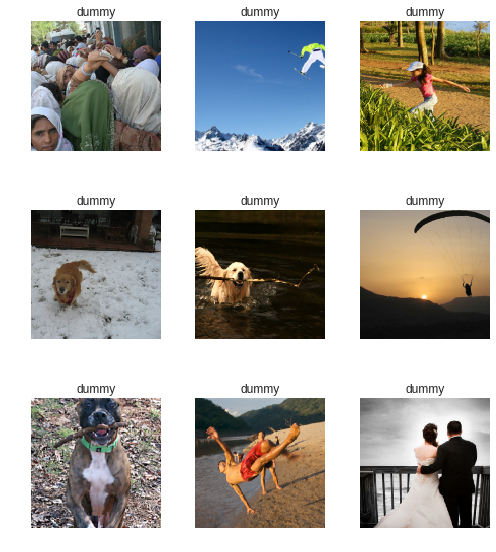

In [0]:
data.show_batch(rows=3, figsize=(7,8))

### Image Model
Generate features for all images in the dataset and store them

In [0]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

image_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(path.as_posix(), transforms.Compose([
            transforms.RandomSizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=bs, shuffle=True,
        num_workers=0, pin_memory=True)


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


In [0]:
image_loader.dataset

Dataset ImageFolder
    Number of datapoints: 16182
    Root Location: /gdrive/My Drive/data/flick8k
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [0]:
!ls  /gdrive/My\ Drive/data/flick8k/Flicker8k_Dataset/ | wc -l

8091


In [0]:
data.fix_dl.items

array([PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'),
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/1001773457_577c3a7d70.jpg'),
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg'),
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/1003163366_44323f5815.jpg'), ...,
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/99171998_7cc800ceef.jpg'),
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/99679241_adc853a5c0.jpg'),
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/997338199_7343367d7f.jpg'),
       PosixPath('/gdrive/My Drive/data/flick8k/Flicker8k_Dataset/997722733_0cb5439472.jpg')], dtype=object)

In [0]:
# create a learner
learn = create_cnn(data, models.resnet34, metrics=error_rate, bn_final=True)
# we need the model as is for evaluation
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.model[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, ker

Test extracting features for one picture

In [0]:
fn = path/'Flicker8k_Dataset/1000268201_693b08cb0e.jpg'
x = open_image(fn)
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [0]:
xb.shape

torch.Size([1, 3, 128, 128])

In [0]:
learn.model[0](xb).shape

torch.Size([1, 512, 4, 4])

In [0]:
learn.model[0](xb).mean(-1).mean(-1).shape

torch.Size([1, 512])

#### Image Feature extraction

In [0]:
from tqdm import tqdm

In [0]:
def generate_features(learner, bunch, features_path):
    dataloader = bunch.fix_dl
    # get the list of image filenames
    paths = dataloader.items
    # index over the filenames
    index = 0
    # for every batch in the DataLoader
    for batch in tqdm(dataloader):
        # get the input (we don't need the labels)
        X, y = batch
        # run the model to get the image features
        preds = learner.model[0](X)
        for prediction in preds:
            # prediction shape is: batch_size, 512, 4, 4 (i.e. output of the last BatchNorm layer)
            # avergare over the the last two dimensions
            features = prediction.mean(-1).mean(-1)
            # append features to output
            #image_name = paths[index].name
            #features_by_fname[image_name] = features
            # save the features as .pkl
            feathures_name = paths[index].stem + '.pkl'
            torch.save(features, features_path/feathures_name)
            # next index
            index += 1

In [0]:
# create a folder to store generated features
features_path = path/'features'
features_path.mkdir(parents=True, exist_ok=True)

In [0]:
generate_features(learn, data, features_path)

100%|██████████| 148/148 [02:35<00:00,  1.37it/s]


In [0]:
!ls /gdrive/My\ Drive/data/flick8k/features/* | wc -l

7091


### Description Lanaguage Model

Load token files

In [0]:
!head /gdrive/My\ Drive/data/flick8k/Flickr8k.token.txt

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg#1	A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg#2	A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg#3	Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg#4	Two dogs on pavement moving toward each other .


load captions into a dataframe

In [0]:
df = pd.read_csv(path/'Flickr8k.token.txt', names=['id', 'caption'], delimiter='\t') 
df['number'] = df['id'].apply(lambda x: int(x.split('#')[1]))
df['id'] = df['id'].apply(lambda x: x.split('#')[0])
df.head()

,id,caption,number
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,0
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,1
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,2
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,3
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,4


In [0]:
df['caption'][0]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

#### Create a language model

In [0]:
data_lm = (TextList.from_df(df, path, cols='caption')
                .random_split_by_pct()
                .label_for_lm()
                .databunch(bs=bs))

In [0]:
data_lm.show_batch(5)

idx,text
0,xxbos a young boy wearing a white shirt is playing in the sea on a beach . xxbos a smiling child is surrounded by colored balls . xxbos a group of people xxunk around while a man in a fish costume descends a staircase . xxbos xxmaj man with injured eye and woman holding child pose outside of building . xxbos xxmaj dog with tongue out looking up at a
1,a black hat holds a little girl with a crown of flowers . xxbos xxmaj two black dogs in the snow . xxbos a child in a blue and white striped shirt crosses his arms and smiles while standing on red carpeted stairs . xxbos a young child plays with sidewalk chalk by dropping it on the xxunk . xxbos a man with a damaged eye stands with a child
2,"outside near a xxunk street , xxbos xxmaj two golden dogs playing with one another xxbos a small child wearing light blue overalls sits on a red slide . xxbos a woman wearing a light blue coat looks to the left while a man looks to the right . xxbos a small dog stands next to a larger dog , out in a field . xxbos a skateboarder jumping from"
3,"white dog . xxbos a young boy on a basketball team dribbles the ball . xxbos xxmaj an adult xxunk a baby wearing a bib , the baby has food around its mouth . xxbos xxmaj two girls walking on a wet sidewalk xxbos a woman taking off a large xxunk xxunk a xxunk dress xxbos xxmaj group of people sitting in lounge chairs on patio looking at mountains ."
4,the blue shirt faces away . xxbos xxmaj three children in jackets looking at water 's edge looking at their reflections in a lake xxbos xxmaj three women wearing wigs . xxbos a young child walking in the desert with her head covered with a scarf xxbos a white dog in a brown collar drinking from a spigot . xxbos xxmaj four kids doing xxunk in a yard covered with


#### Train language model

In [0]:
learn_lm = language_model_learner(data, drop_mult=0.3)

In [0]:
learn_lm.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


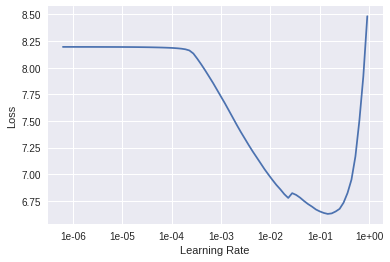

In [0]:
learn_lm.recorder.plot(skip_end=12)

In [0]:
learn_lm.fit_one_cycle(1, 5e-4, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.906351,4.572077,0.255767


In [0]:
learn_lm.predict('A boy corssing', 10, temperature=1.1)

'A boy corssing lies unseen many small dogs enclosure jumps racing a in'

In [0]:
learn_lm.model

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(3666, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(3666, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=3666, bias=True)
    (output_dp): RNNDropout()
  )
)

In [0]:
data_lm

In [0]:
learn.model[0]

RNNCore(
  (encoder): Embedding(3666, 400, padding_idx=1)
  (encoder_dp): EmbeddingDropout(
    (emb): Embedding(3666, 400, padding_idx=1)
  )
  (rnns): ModuleList(
    (0): WeightDropout(
      (module): LSTM(400, 1150)
    )
    (1): WeightDropout(
      (module): LSTM(1150, 1150)
    )
    (2): WeightDropout(
      (module): LSTM(1150, 400)
    )
  )
  (input_dp): RNNDropout()
  (hidden_dps): ModuleList(
    (0): RNNDropout()
    (1): RNNDropout()
    (2): RNNDropout()
  )
)

In [0]:
x = 'A'
xb,_ = data.one_item(x)

In [0]:
next_token, (hs_11, hs_12, hs_13), (hs_21, hs_22, hs_23) = learn_lm.model(xb)
#output.shape, [t.shape for t in output[1]], [t.shape for t in output[2]]
next_token.shape, (hs_11.shape, hs_12.shape, hs_13.shape), (hs_21.shape, hs_22.shape, hs_23.shape)

(torch.Size([1, 3666]),
 (torch.Size([1, 1, 1150]), torch.Size([1, 1, 1150]), torch.Size([1, 1, 400])),
 (torch.Size([1, 1, 1150]), torch.Size([1, 1, 1150]), torch.Size([1, 1, 400])))

In [0]:
output = learn.model[0](xb)
[t.shape for t in output[0]], [t.shape for t in output[1]]

([torch.Size([1, 1, 1150]), torch.Size([1, 1, 1150]), torch.Size([1, 1, 400])],
 [torch.Size([1, 1, 1150]), torch.Size([1, 1, 1150]), torch.Size([1, 1, 400])])

### Combined Model

In [0]:
class CombinedModel(nn.Module):
    def __init__(self, model_fm, model_lm, features_size, vocab_size):
        super().__init__()
        self.model_fm = model_fm # feature model  (bs, features_size)
        self.model_lm = model_lm # language model (bs, vocab_size)
        self.dense = nn.linear(features_size + vocab_size, vocab_size)
        self.norm = nn.BatchNorm1d(vocab_size)
        
    def forward(self, X_image, X_word):
        img_embd = self.model_fm(X_image)
        tkn_embd, hs1, hs2 = self.model_lm(X_word)
        concat = torch.cat((img_embd, tkn_embd), 1)
        dense_out = self.dense(concat)
        return self.norm(dense_out)

In [0]:
model_combined = CombinedModel(model_ft, model_lm, features_size=512, vocab_size=3666)

NameError: ignored